# Deep Learning

Deep learning is a subset of machine learning that deals with neural networks. Technically, it deals with neural networks with at least three layers: an input layer, an output layer, and at least one hidden layer. Almost all neural networks meet this loose criteria, and thus, you can think of deep learning as the branch of machine learning that concerns neural networks.

## 1 | Install New Dependencies

In [1]:
#Neural Network
%pip install keras tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Graphing
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Fixes a glitch with the pyplot install
%pip install --upgrade --force-reinstall nbformat

  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached fastjsonschema-2.20.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached jupyter_core-5.7.2-py3-none-any.whl.metadata (3.4 kB)
  Using cached traitlets-5.14.3-py3-none-any.whl.metadata (10 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.35.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached platformdirs-4.2.2-py3-none-any.whl.metadata (11 kB)
  Using cached pywin32-306-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
Using cached fastjsonschema-2.20.0-py3-none-any.whl (23 kB)
Using cached jsonschema-4.23.0-py3-none-any.whl (88 kB)
Using cached jupyter_core-5.7.2-py3-none-any.whl (28 kB)
Using cached traitlets-5.14.3-py3-none-any.whl (85 kB)
Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl (18 kB)
Using cac

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


## 2 | Dataset Cleaning and Exploration

In [4]:
#Surpress project warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [6]:
df = pd.read_csv("domestic_homicides.csv")
df

,ID,Homicide,Sex,EthnicAppearance_cleaned,Age,InitialRisk,AccHowKnown,Known 1,Known 2,ProceedingsType,Crimes in pre,Crimes in pre 1,DV in Pre,DV in Pre 1
0,12202,No,M,Afro-Caribbean,17,H,Ex Boyfriend of victim,Boy/Girlfriend,Ex,Charge/further charge,1,Yes,0,No
1,12376,No,M,Afro-Caribbean,20,S,Boyfriend of victim,Boy/Girlfriend,Current,Charge/further charge,2,Yes,0,No
2,12567,No,M,Afro-Caribbean,21,S,Ex Boyfriend of victim,Boy/Girlfriend,Ex,Second time charged,1,Yes,0,No
3,12222,No,M,Afro-Caribbean,22,M,Boyfriend of victim,Boy/Girlfriend,Current,Second time charged,1,Yes,0,No
4,12480,Yes,M,Arab,23,S,Boyfriend of victim,Boy/Girlfriend,Current,Charge/further charge,2,Yes,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,11981,Yes,M,South European - White,65,H,Husband of victim,Partner/Spouse,Current,Charge/further charge,0,No,0,No
2496,10398,No,M,South European - White,85,S,Husband of victim,Partner/Spouse,Current,Summons,0,No,0,No
2497,11141,No,M,Middle Eastern,32,M,Boyfriend of victim,Boy/Girlfriend,Current,Charge/further charge,0,No,0,No
2498,2145,No,F,Middle Eastern,35,S,Wife of victim,Partner/Spouse,Current,Charge/further charge,0,No,0,No


<Axes: xlabel='Homicide', ylabel='count'>

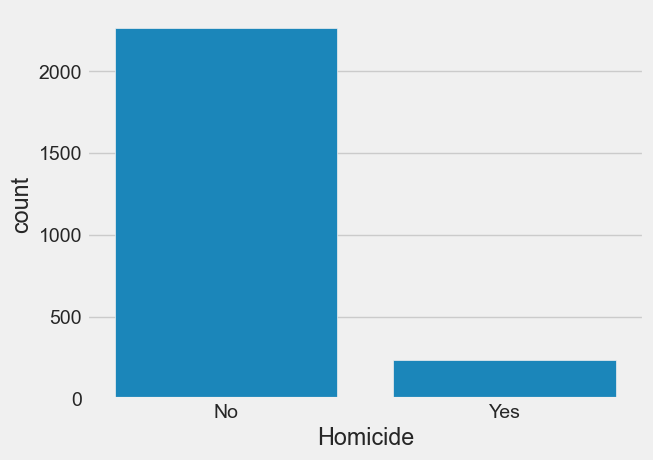

In [7]:
#Exploratory Data Analysis
sns.countplot(x='Homicide', data=df)

This dataset is extremely imbalanced, much like during the last module

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        2500 non-null   int64 
 1   Homicide                  2500 non-null   object
 2   Sex                       2500 non-null   object
 3   EthnicAppearance_cleaned  2500 non-null   object
 4   Age                       2500 non-null   int64 
 5   InitialRisk               2500 non-null   object
 6   AccHowKnown               2500 non-null   object
 7   Known 1                   2500 non-null   object
 8   Known 2                   2500 non-null   object
 9   ProceedingsType           2500 non-null   object
 10  Crimes in pre             2500 non-null   int64 
 11  Crimes in pre 1           2500 non-null   object
 12  DV in Pre                 2500 non-null   int64 
 13  DV in Pre 1               2500 non-null   object
dtypes: int64(4), object(10)


In [9]:
# recode object columns
df['Homicide'].replace(('No', 'Yes'), (0, 1), inplace=True)
df['Sex'].replace(('M', 'F'), (0, 1), inplace=True)
df['EthnicAppearance_cleaned'].replace(('Afro-Caribbean', 'Arab', 'Asian', 'Black',
       'Chinese, Japanese or SE Asian', 'Middle Eastern',
       'North European - White', 'South European - White', 'Unknown',
       'White European'), (0,1,2,3,4,5,6,7,8,9), inplace=True)
df['InitialRisk'].replace(('H', 'S', 'M', 'Unknown'), (0, 1,2,3), inplace=True)
df['AccHowKnown'].replace(('Ex Boyfriend of victim', 'Boyfriend of victim',
       'Husband of victim', 'Ex Girlfriend of victim',
       'Girlfriend of victim', 'Ex Wife of victim', 'Wife of victim',
       'Ex Husband of victim', 'Same Sex Ex intimate Partner',
       'Ex Common Law Husband of victim', 'Common Law Husband of victim',
       'Common Law Wife of victim', 'Civil Partner Same Sex',
       'Ex Common Law Wife of victim', 'Same Sex Intimate Partner',
       'Ex Civil Partner Same Sex '), (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15), inplace=True)
df['Known 1'].replace(('Boy/Girlfriend', 'Partner/Spouse'), (0, 1), inplace=True)
df['Known 2'].replace(('Ex', 'Current'), (0, 1), inplace=True)
df['ProceedingsType'].replace(('Charge/further charge', 'Second time charged', 'Adult caution',
       'First time charged', 'Youth Conditional Caution',
       'Third and subsequent time charged', 'Summons',
       'Postal Charge Requisition', 'Conditional caution', 'TIC',
       'Youth Caution'), (0,1,2,3,4,5,6,7,8,9,10), inplace=True)
df['Crimes in pre 1'].replace(('No', 'Yes'), (0, 1), inplace=True)
df['DV in Pre 1'].replace(('No', 'Yes'), (0, 1), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   ID                        2500 non-null   int64
 1   Homicide                  2500 non-null   int64
 2   Sex                       2500 non-null   int64
 3   EthnicAppearance_cleaned  2500 non-null   int64
 4   Age                       2500 non-null   int64
 5   InitialRisk               2500 non-null   int64
 6   AccHowKnown               2500 non-null   int64
 7   Known 1                   2500 non-null   int64
 8   Known 2                   2500 non-null   int64
 9   ProceedingsType           2500 non-null   int64
 10  Crimes in pre             2500 non-null   int64
 11  Crimes in pre 1           2500 non-null   int64
 12  DV in Pre                 2500 non-null   int64
 13  DV in Pre 1               2500 non-null   int64
dtypes: int64(14)
memory usage: 273.6 KB


In [10]:
# recode numberic columns
df['Age'] = pd.to_numeric(df['Age'],downcast="float")
df['Crimes in pre'] = pd.to_numeric(df['Age'],downcast="float")
df['DV in Pre'] = pd.to_numeric(df['Age'],downcast="float")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2500 non-null   int64  
 1   Homicide                  2500 non-null   int64  
 2   Sex                       2500 non-null   int64  
 3   EthnicAppearance_cleaned  2500 non-null   int64  
 4   Age                       2500 non-null   float32
 5   InitialRisk               2500 non-null   int64  
 6   AccHowKnown               2500 non-null   int64  
 7   Known 1                   2500 non-null   int64  
 8   Known 2                   2500 non-null   int64  
 9   ProceedingsType           2500 non-null   int64  
 10  Crimes in pre             2500 non-null   float32
 11  Crimes in pre 1           2500 non-null   int64  
 12  DV in Pre                 2500 non-null   float32
 13  DV in Pre 1               2500 non-null   int64  
dtypes: float

## 3 | Create Train/Test Split and Correct Data Imbalance via SMOTE

In [11]:
#Seperate dataset into features (X) and labels (y)
X = df.drop(['ID', 'Homicide'], axis=1)
y = df['Homicide']

In [12]:
X

,Sex,EthnicAppearance_cleaned,Age,InitialRisk,AccHowKnown,Known 1,Known 2,ProceedingsType,Crimes in pre,Crimes in pre 1,DV in Pre,DV in Pre 1
0,0,0,17.0,0,0,0,0,0,17.0,1,17.0,0
1,0,0,20.0,1,1,0,1,0,20.0,1,20.0,0
2,0,0,21.0,1,0,0,0,1,21.0,1,21.0,0
3,0,0,22.0,2,1,0,1,1,22.0,1,22.0,0
4,0,1,23.0,1,1,0,1,0,23.0,1,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,7,65.0,0,2,1,1,0,65.0,0,65.0,0
2496,0,7,85.0,1,2,1,1,6,85.0,0,85.0,0
2497,0,5,32.0,2,1,0,1,0,32.0,0,32.0,0
2498,1,5,35.0,1,6,1,1,0,35.0,0,35.0,0


In [13]:
y

0       0
1       0
2       0
3       0
4       1
       ..
2495    1
2496    0
2497    0
2498    0
2499    0
Name: Homicide, Length: 2500, dtype: int64

In [14]:
#Divide into X_train and y_train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [15]:
X_test

,Sex,EthnicAppearance_cleaned,Age,InitialRisk,AccHowKnown,Known 1,Known 2,ProceedingsType,Crimes in pre,Crimes in pre 1,DV in Pre,DV in Pre 1
2032,0,6,48.0,1,0,0,0,0,48.0,0,48.0,0
1714,0,6,36.0,1,1,0,1,0,36.0,0,36.0,0
2283,0,7,37.0,1,0,0,0,0,37.0,0,37.0,0
1005,0,3,46.0,0,1,0,1,0,46.0,0,46.0,0
286,0,2,58.0,1,2,1,1,0,58.0,0,58.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1378,1,6,25.0,1,4,0,1,0,25.0,1,25.0,0
681,0,3,30.0,0,0,0,0,0,30.0,0,30.0,0
914,1,3,40.0,1,4,0,1,0,40.0,0,40.0,0
1197,1,6,16.0,1,4,0,1,0,16.0,0,16.0,0


In [16]:
#Initial homicide count
y_train.value_counts()

Homicide
0    1810
1     190
Name: count, dtype: int64

In [17]:
#Fixes dataset imbalance (see module on decision trees)
from imblearn.over_sampling import SMOTE
smote_resampler = SMOTE()
X_train, y_train = smote_resampler.fit_resample(X_train, y_train)

#New homicide count - much more balanced
y_train.value_counts()

Homicide
0    1810
1    1810
Name: count, dtype: int64

## 4 | Create Neural Network

In [18]:
#Create a neural network for binary classification:
from keras.models import Sequential
from keras.layers import Dense
import keras as keras

model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=12))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[keras.metrics.Precision(), keras.metrics.BinaryAccuracy()]) 
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,793 (7.00 KB)

 Trainable params: 1,793 (7.00 KB)

 Non-trainable params: 0 (0.00 B)

The next step is to train the model. Notice the validation_data parameter passed to fit, which uses the test data split off from the larger dataset to assess the model’s accuracy as training takes place:

In [19]:
#Trains the model.
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=100)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - binary_accuracy: 0.4939 - loss: 1.7912 - precision: 0.4925 - val_binary_accuracy: 0.5840 - val_loss: 0.6698 - val_precision: 0.1357
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.5914 - loss: 0.6579 - precision: 0.5945 - val_binary_accuracy: 0.6080 - val_loss: 0.6438 - val_precision: 0.1256
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6816 - loss: 0.6030 - precision: 0.6692 - val_binary_accuracy: 0.6980 - val_loss: 0.5812 - val_precision: 0.1533
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7082 - loss: 0.5793 - precision: 0.7104 - val_binary_accuracy: 0.5720 - val_loss: 0.6687 - val_precision: 0.1187
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7182 - loss: 0.5531 - precision: 0.7103 - val_binary_accuracy: 0.6920 - val_loss: 0.5707 - val_precision: 0.1592
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.737

Now plot the training and validation accuracy using the per-epoch values in the history object:

First, let's plot how accuracy changed for each epoch

## 5 | Evaluate Neural Network

### 5.1 | Accuracy by Epoch

[]

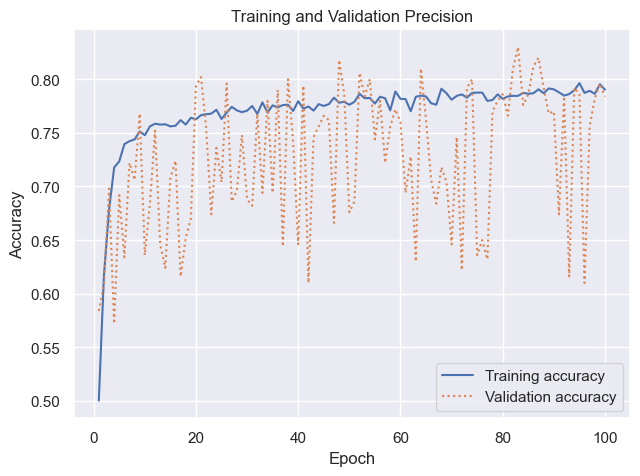

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['binary_accuracy']
val = hist.history['val_binary_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

It's a slow but steady increase, but maybe the better metric is precision. Precision measures the number of true positives relative to all positives. Let's see if it's consistent with the accuracy score.

### 5.2 | Precision by Epoch

[]

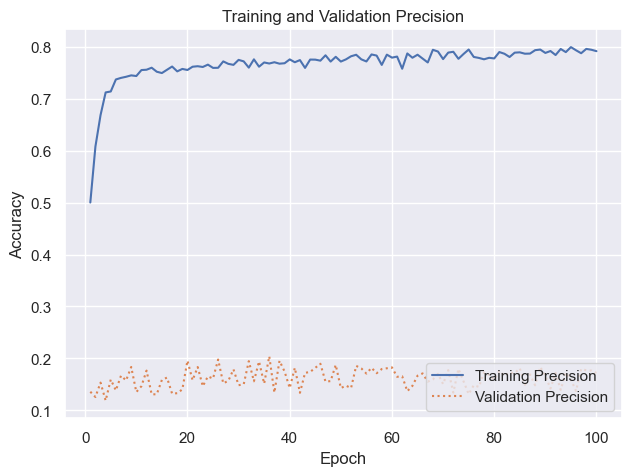

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
prec = hist.history['precision']
val = hist.history['val_precision']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, prec, '-', label='Training Precision')
plt.plot(epochs, val, ':', label='Validation Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

### 5.3 | Loss by Epoch

Loss (also known as cost) is the amount of error generated by the neural network. As the neural network trains, the error produces (loss) should go down. 

The loss curve is powerful because it is perhaps the best way to visualize how a neural network trained. The shape of the curve, as well as how quickly the network reached asymptotic performance, gives powerful insights into how the neural network learned.

[]

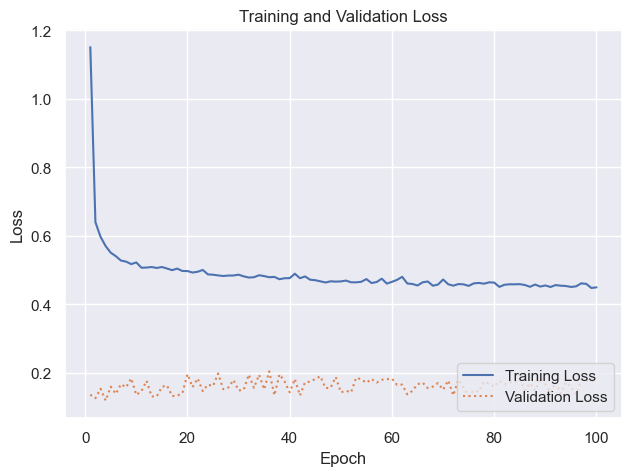

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
prec = hist.history['loss']
val = hist.history['val_precision']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, prec, '-', label='Training Loss')
plt.plot(epochs, val, ':', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.plot()

The dataset experienced a rapid amount of learning early on, and then very quickly reached a sort of asymptotic performance. This suggests that the learning rate could have been set too high, and that the model will have difficulty reaching its true peak performance. Thus, future iterations of the network should decrease the learning rate.

### 5.4 | Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# see how these are numbers between 0 and 1? 
model.predict(X_test) # prob of successes (survival)
np.round(model.predict(X_test),0) # 1 and 0 (survival or not)
y_test # 1 and 0 (survival or not)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step


2032    1
1714    0
2283    0
1005    1
286     1
       ..
1378    0
681     0
914     0
1197    0
796     0
Name: Homicide, Length: 500, dtype: int64

In [24]:
# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(X_test),0)

# confusion matrix
print(confusion_matrix(y_test, preds)) # order matters! (actual, predicted)

#Key for understanding the matrix:
#([TN, FP],
# [Fn, TP])

print(classification_report(y_test, preds))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step
[[376  77]
 [ 31  16]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       453
           1       0.17      0.34      0.23        47

    accuracy                           0.78       500
   macro avg       0.55      0.59      0.55       500
weighted avg       0.85      0.78      0.81       500



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step


Text(102.44999999999999, 0.5, 'Actual label')

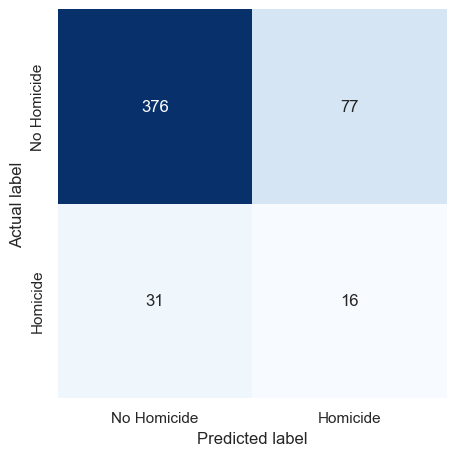

In [25]:
from sklearn.metrics import confusion_matrix
 
y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['No Homicide', 'Homicide']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

The model performs remarkably well. It is able to correctly identify more homicides than any other machine learning algorithm that we ahve used.

The false positive rate is still relatively high, but this can be improved through more training and additional adjustment.